In [1]:
#https://youtu.be/kgdJXN-M3g0 <<<<link to video on this project

#TWEAK the code below to make the following changes:
#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
#2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart.  
#3) conform to a company's marketing / recommended color requirements and share the link to the palette in your code.
#4) submit your homework as a link to your github ipynb page.

In [2]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

# make plots static
%matplotlib inline

In [3]:
# change the dataset to your own data.  it can be ANYTHING, as long as you can make a dashboard from it.
#use different data!
df = pd.DataFrame({'Color':['Red', 'Green' ,'Seafoam', 'White', 'Black', 'Red', 'Blue', 'Green', 
                             'Yellow', 'Black', 'White', 'Red', 'Yellow', 'Blue', 'Green', 'White',
                            'Blue', 'Blue', 'Red', 'Black', 'Yellow', 'Seafoam', 'Green'], 
                   'Favorite':[9, 8, 3, 1, 10, 7, 4, 1, 
                             1, 9, 4, 7, 3, 6, 10, 9,
                            5, 6, 3, 4, 6, 1, 1]})
df

,Color,Favorite
0,Red,9
1,Green,8
2,Seafoam,3
3,White,1
4,Black,10
5,Red,7
6,Blue,4
7,Green,1
8,Yellow,1
9,Black,9


/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn


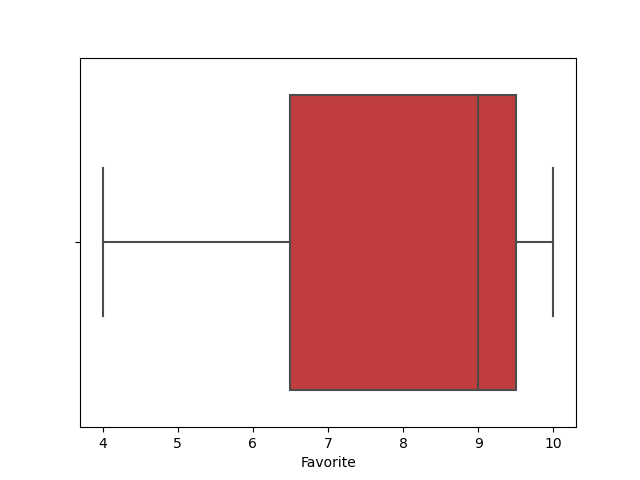
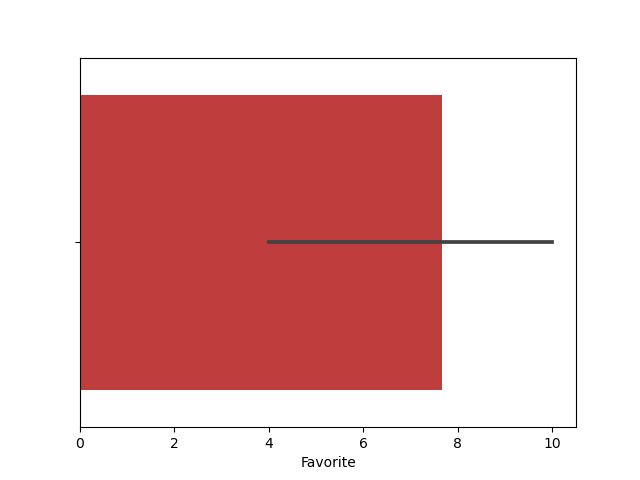
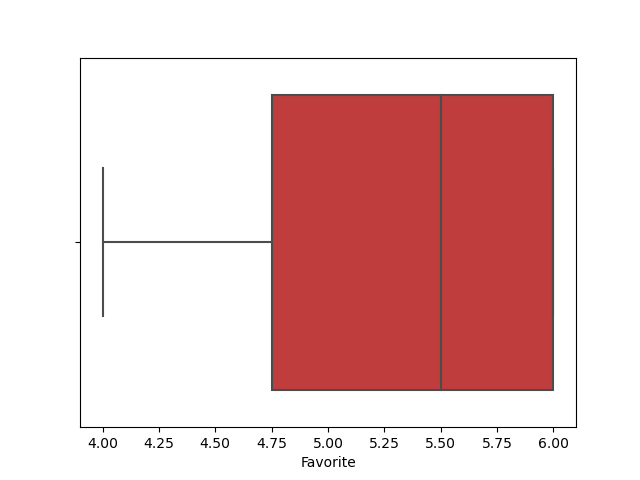
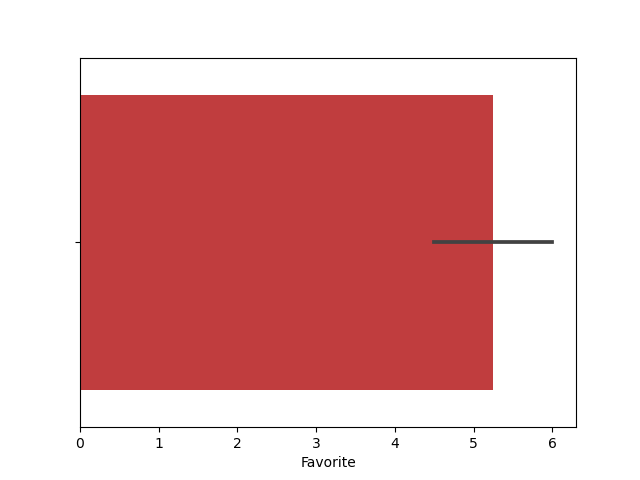
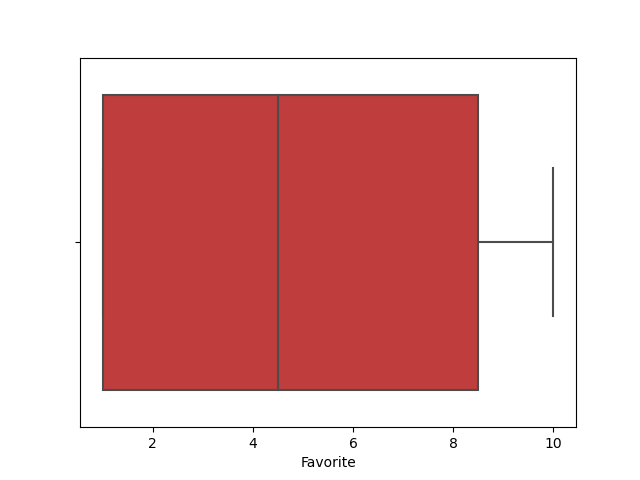
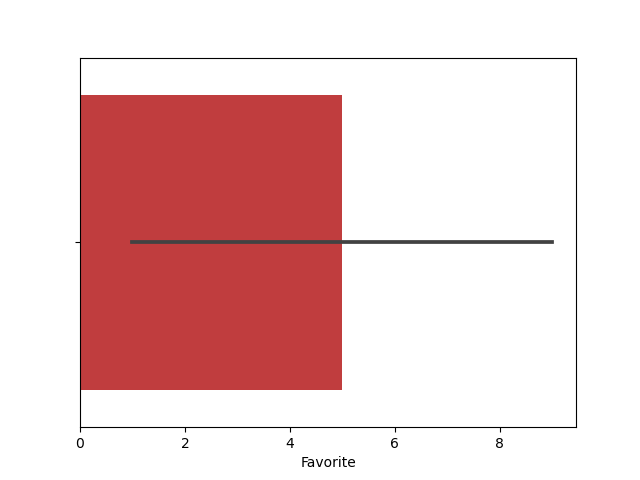
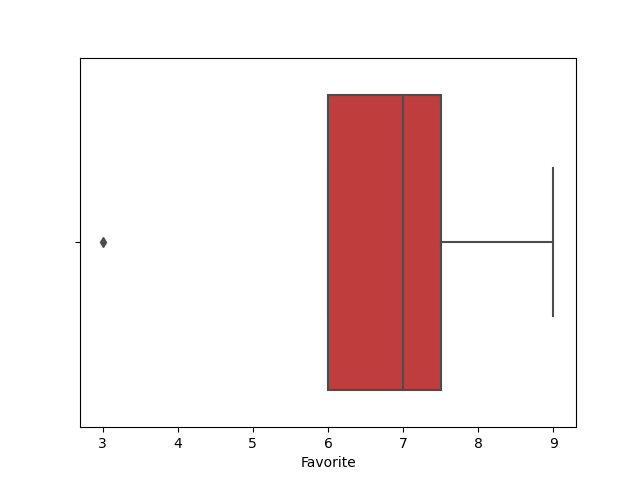
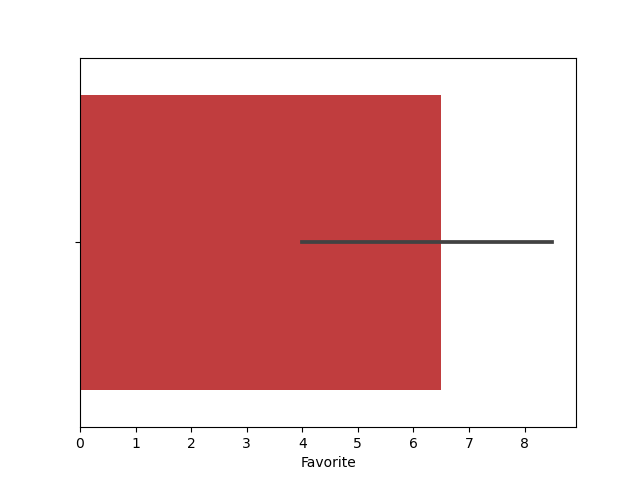
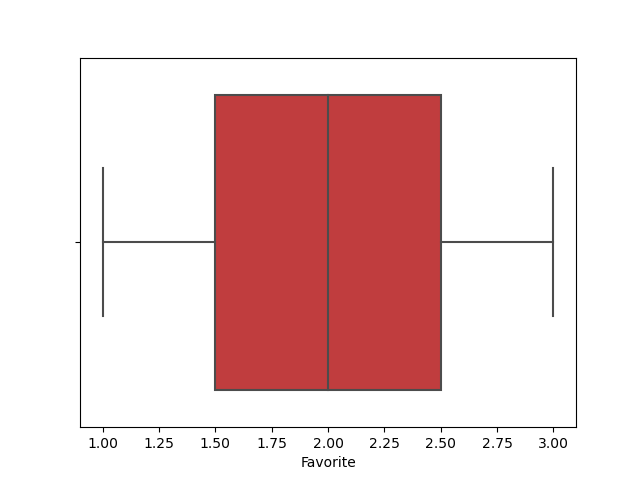
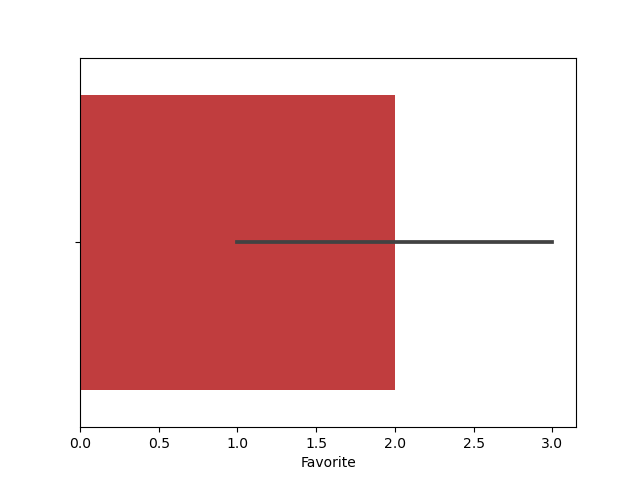
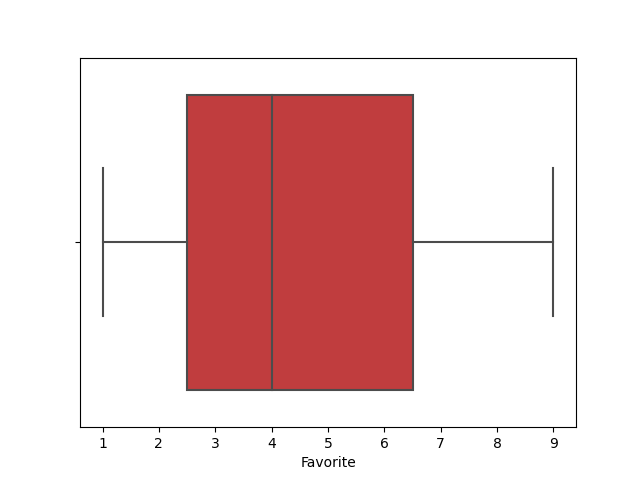
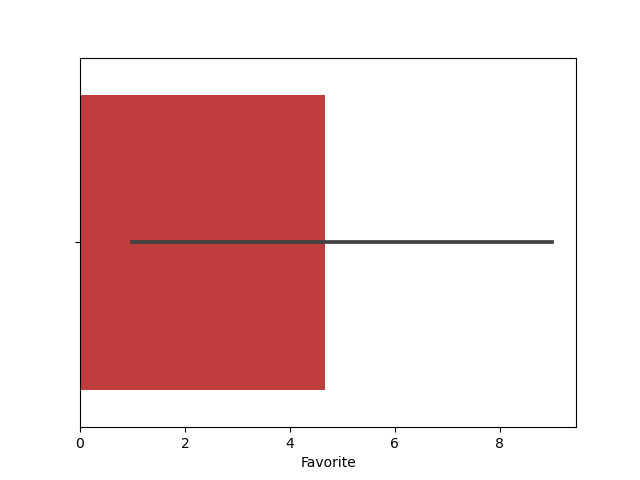
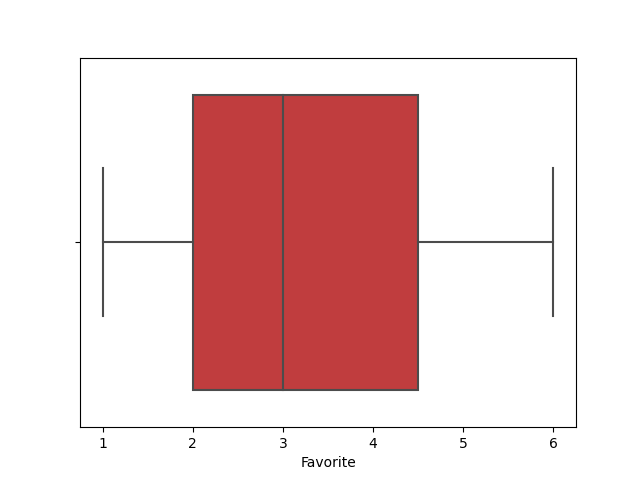
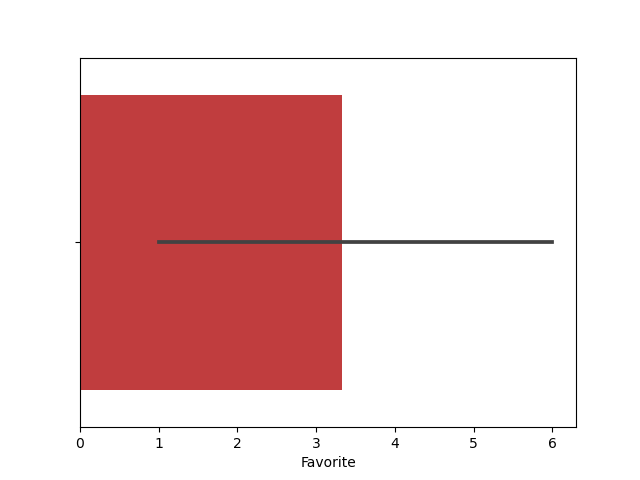
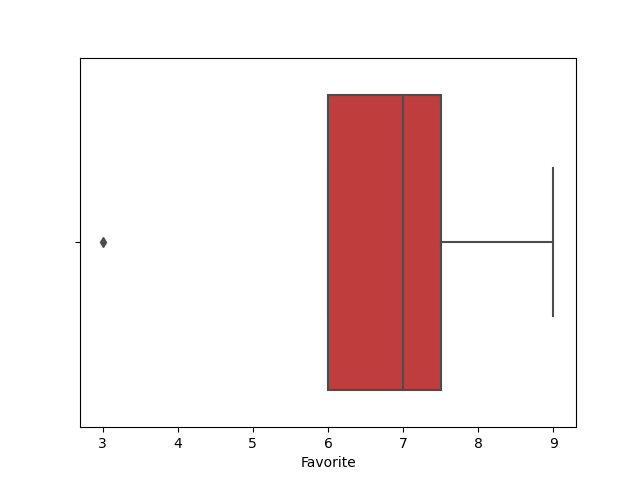
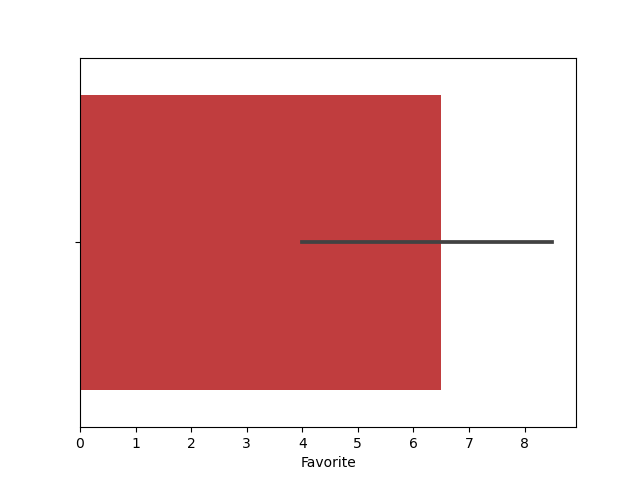

In [4]:
# create a class containing an animal selector drop-down, various plots, and a data table output
class RatingsDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Red'
    Color = param.ObjectSelector(default='Red', objects=list(df.Color.unique()))
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.Color==self.Color)].copy()
        return class_df

    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['Favorite'], color='C84113') # color taken from U of I branding colors
        plt.close()
        return ax.figure
    
    # second visualization: Bar plot
    def bar_view(self):
        data = self.get_data()
        ax = sns.barplot(data['Favorite'], color='C84113') # color taken from U of I branding colors
        plt.close()
        return ax.figure
    
    # table of data for the chosen animal
    def table_view(self):
        data = self.get_data()
        return data

# create an instance of the class
rd = RatingsDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Color Favorite Dashboard'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a dummy data set of color favorites.'

dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Color' drop down selector
                      rd.box_view,    # box plot
                      rd.bar_view,    # bar plot
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 5)